In [16]:
import numpy as np
import pandas as pd 
from scipy.special import expit
import matplotlib.pyplot as plt

In [17]:
train = pd.read_csv("data/train_lr.csv")
valid = pd.read_csv("data/valid_lr.csv")
test = pd.read_csv("data/test_lr.csv")

In [18]:
X_train = np.array(train.iloc[:, :10000])
y_train = np.array(train['target'])
X_valid = np.array(valid.iloc[:, :10000])
y_valid = np.array(valid['target'])
X_test = np.array(test)

### batch gradient descent 

In [48]:
loss_BGD = []
loss_BGD_valid = []
c_reg = 0.01
stepsize = 0.001

In [49]:
w = np.zeros(10000)
s = expit(np.dot(X_train, w))
J = -np.dot(y_train.T, np.log(s)) - np.dot((1-y_train).T, np.log(1-s)) + c_reg * np.dot(w.T, w)
s_v = expit(np.dot(X_valid, w))
J_v = -np.dot(y_valid.T, np.log(s_v)) - np.dot((1-y_valid).T, np.log(1-s_v)) + c_reg * np.dot(w.T, w)
loss_BGD.append(J)
loss_BGD_valid.append(J_v)

In [50]:
for epoch in range(1000):
    w = w + stepsize * np.dot(X_train.T, (y_train - s)) - 2*stepsize*c_reg*w
    s = expit(np.dot(X_train, w))
    s_v = expit(np.dot(X_valid, w))
    J = -np.dot(y_train.T, np.log(s+1e-30)) - np.dot((1-y_train).T, np.log(1-s+1e-30)) + c_reg * np.dot(w.T, w)
    J_v = -np.dot(y_valid.T, np.log(s_v+1e-30)) - np.dot((1-y_valid).T, np.log(1-s_v+1e-30)) + c_reg * np.dot(w.T, w)
    loss_BGD.append(J)
    loss_BGD_valid.append(J_v)

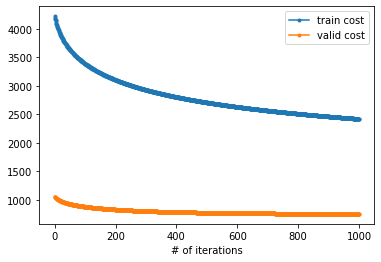

In [51]:
x = range(1001)
plt.plot(x, loss_BGD, label = 'train cost', marker = '.')
plt.plot(x, loss_BGD_valid, label = 'valid cost', marker = '.')
plt.xlabel('# of iterations')
plt.legend()
plt.show()

In [53]:
print(loss_BGD[1000])
print(loss_BGD_valid[1000])

2419.5892051945298
753.7857512398791


In [54]:
pred = (np.dot(X_test, w) > 0.5) + 0
pred 

array([1, 0, 1, ..., 1, 1, 0])

In [55]:
test_data = pd.read_csv("data/test.csv")
preds_df = pd.DataFrame({"id": test_data["id"], "target": pred})
preds_df.to_csv(f"data/output_lr_2.csv", index=False)

### stochastic gradient descent 

In [64]:
loss_SGD = []
loss_SGD_valid = []
c_reg = 0.001
stepsize = 0.01

In [65]:
w = np.zeros(10000)
s = expit(np.dot(X_train, w))
s_v = expit(np.dot(X_valid, w))
J = -np.dot(y_train.T, np.log(s)) - np.dot((1-y_train).T, np.log(1-s)) + c_reg * np.dot(w.T, w)
J_v = -np.dot(y_valid.T, np.log(s_v)) - np.dot((1-y_valid).T, np.log(1-s_v)) + c_reg * np.dot(w.T, w)
loss_SGD.append(J)
loss_SGD_valid.append(J_v)

In [66]:
np.random.seed(17)
for epoch in range(10000): 
    k = np.random.randint(6090)
    w = w + stepsize * X_train[k].T * (y_train[k] - s[k]) - 2*stepsize*c_reg*w
    s = expit(np.dot(X_train, w))
    J = -np.dot(y_train.T, np.log(s+1e-30)) - np.dot((1-y_train).T, np.log(1-s+1e-30)) + c_reg * np.dot(w.T, w)
    s_v = expit(np.dot(X_valid, w))
    J_v = -np.dot(y_valid.T, np.log(s_v+1e-30)) - np.dot((1-y_valid).T, np.log(1-s_v+1e-30)) + c_reg * np.dot(w.T, w)
    loss_SGD.append(J)
    loss_SGD_valid.append(J_v)

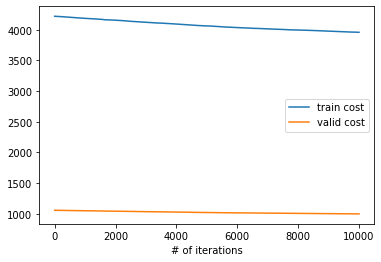

In [72]:
x = range(10001)
plt.plot(x, loss_SGD, label = 'train cost')
plt.plot(x, loss_SGD_valid, label = 'valid cost')
plt.xlabel('# of iterations')
plt.legend()
plt.show()

In [74]:
print(loss_SGD[10000])
print(loss_SGD_valid[10000])

3959.393876054222
996.4602840254937
